In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
#upload data
data_f=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
data_t=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
#divide into 2 datasets 
data_f['Class']=0
data_t['Class']=1
data = pd.concat([data_f,data_t])
data = data.drop(columns=['title','subject','date'])

In [3]:
data.shape
#check data shape

(44898, 2)

0    23481
1    21417
Name: Class, dtype: int64

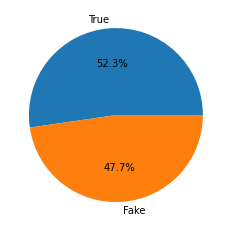

In [4]:
piechart=data['Class'].value_counts()
label=('True','Fake')
plt.pie(piechart,labels=label,autopct='%1.1f%%')
piechart

almost balanced data, so don`t need to balance it

**let`s see 1 example:**
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images

**So, in data we have:unnecessary numbers, sign(@,/,...)**

In [5]:
#check null data
data.isnull().sum()

text     0
Class    0
dtype: int64

In [6]:
#remove duplicated data(6251)
print(data.duplicated().sum())

index_duplicated = data[data['text'].duplicated() == True].index
data.drop(index_duplicated, axis = 0, inplace = True)
data.reset_index(inplace=True, drop = True)

6251


In [7]:
data.shape
#check shape after deleting duplicates

(33643, 2)

In [8]:
import re
def cleanTxt(text):
    text = re.sub('\w+:\/\/\S+', '', text)# remove hyperlink
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'@\w+|#\w+', '', text) #remove @mentions
    text.lower()
    return text
data['text']=data['text'].apply(cleanTxt)   

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords          # module for stop words
from nltk.stem import PorterStemmer        # module for stemming

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#stemming,remove stop words and numbers
stopwords_english = stopwords.words('english')
stemmer = PorterStemmer() 

def stemming(text):
    text = text.split()
    text=[stemmer.stem(y) for y in text]
    return " " .join(text)

def remove_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stopwords_english]
    return " ".join(Text)

def normalize_text(df):
    df.text=df.text.apply(lambda text : remove_stop_words(text))
    df.text=df.text.apply(lambda text : stemming(text))
    df.text=df.text.apply(lambda text : remove_numbers(text))
    return df


normalize_text(data)

,text,Class
0,donald trump wish american happi new year leav...,0
1,hous intellig committe chairman devin nune go ...,0
2,on friday reveal former milwauke sheriff david...,0
3,on christma day donald trump announc would bac...,0
4,pope franci use annual christma day messag reb...,0
...,...,...
33638,islamabad reuter outlin new strategi war afgha...,1
33639,geneva reuter north korea unit state clash u n...,1
33640,geneva reuter north korea unit state accus tue...,1
33641,moscow reuter vatican secretari state cardin p...,1


In [11]:
#text after preprocessing
data.head(3)

,text,Class
0,donald trump wish american happi new year leav...,0
1,hous intellig committe chairman devin nune go ...,0
2,on friday reveal former milwauke sheriff david...,0


**2 example :**
hous intellig committe chairman devin nune go bad day he assumpt like mani us christoph steel dossier prompt russia investig lash depart justic fbi order protect trump as happen dossier start investig accord document obtain new york time former trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clinton on top papadopoulo covfef boy trump administr alleg he much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah el sisi egypt two month elect it known former aid set meet world leader trump team trump ran mere coffe boy in may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt democrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state but two month later leak democrat email began appear onlin australian offici pass inform mr papadopoulo american counterpart accord four current former american foreign offici direct knowledg australian role papadopoulo plead guilti lie f b i cooper wit special counsel robert mueller team thi presid it badli script realiti tv show win

In [12]:
#split into test and train
X=data["text"].values
Y=data["Class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 40)

In [13]:
#function for Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
def matrix(y_test,y_pred,labels):
  cm = confusion_matrix(y_test, y_pred, labels=labels)
  matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  return matrix

# Random Forest Classifier

In [14]:
#testing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

rfc = Pipeline([('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state = 0))])

rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_rfc, Y_test))
print(classification_report(Y_test, y_pred_rfc))

accuracy 0.984048350341821
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5134
           1       0.98      0.98      0.98      4959

    accuracy                           0.98     10093
   macro avg       0.98      0.98      0.98     10093
weighted avg       0.98      0.98      0.98     10093



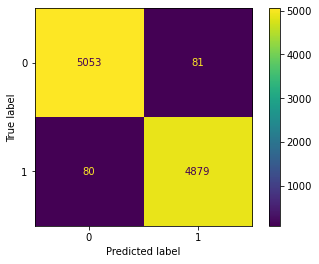

In [15]:
disp=matrix(Y_test, y_pred_rfc, labels=rfc.classes_)
disp.plot()
plt.show()

Next, I want to try with  CountVectorizer()

In [16]:
#testing Random Forest Classifier with  CountVectorizer()
rfc = Pipeline([('vect', CountVectorizer()),
                ('clf', RandomForestClassifier(random_state = 0))])

rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred_rfc, Y_test))
print(classification_report(Y_test, y_pred_rfc))

accuracy 0.9849400574655702
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5134
           1       0.98      0.99      0.98      4959

    accuracy                           0.98     10093
   macro avg       0.98      0.98      0.98     10093
weighted avg       0.98      0.98      0.98     10093



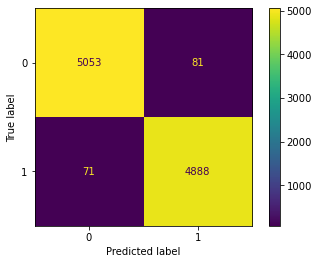

In [17]:
disp=matrix(Y_test, y_pred_rfc, labels=rfc.classes_)
disp.plot()
plt.show()

# MultinomialNB

In [18]:
#testing Naїve Bayes with TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
mnb = Pipeline([('vect', TfidfVectorizer()),
                ('clf', MultinomialNB())])
mnb.fit(X_train, Y_train)
y_pred = mnb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.9314376300406222
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5134
           1       0.93      0.93      0.93      4959

    accuracy                           0.93     10093
   macro avg       0.93      0.93      0.93     10093
weighted avg       0.93      0.93      0.93     10093



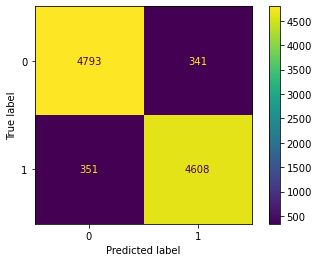

In [19]:
disp=matrix(Y_test, y_pred, labels=mnb.classes_)
disp.plot()
plt.show()

Result is lower than Random Forest, next check with CountVectorizer

In [20]:
#testing Naїve Bayes with CountVectorizer
mnb = Pipeline([('vect', CountVectorizer()),
                ('clf', MultinomialNB())])
mnb.fit(X_train, Y_train)
y_pred = mnb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.9450113940354701
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5134
           1       0.94      0.95      0.94      4959

    accuracy                           0.95     10093
   macro avg       0.94      0.95      0.95     10093
weighted avg       0.95      0.95      0.95     10093



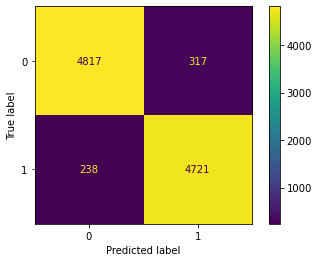

In [21]:
disp=matrix(Y_test, y_pred, labels=mnb.classes_)
disp.plot()
plt.show()